In [1]:
import mysql.connector
import pandas as pd
# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",       # Replace with your host (e.g., "127.0.0.1")
    user="root",   # Your MySQL username
    password="1234", # Your MySQL password
    database="project" # Optional: specify database to connect to
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")
#create cursor object to execute sql queries
cursor = connection.cursor()
# Query the data from walmart data sale
cursor.execute("SELECT * FROM dataset")
#After fetching data from the database we are storing it into Pandas DataFrame
dataset = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(dataset.head(5))

Connected to MySQL!
  Customer ID  Age Preferred Platform Order Frequency    Order Type  \
0    CUST0001   58          Uber Eats          Weekly  Healthy Food   
1    CUST0002   25             Swiggy          Weekly      Desserts   
2    CUST0003   19          Uber Eats          Weekly     Fast Food   
3    CUST0004   65          Uber Eats          Weekly     Beverages   
4    CUST0005   35          Uber Eats    Occasionally     Fast Food   

  Delivery Time Preference Delivery Speed Preference  Satisfaction Rating  \
0                  Evening                      Fast             1.181969   
1                Afternoon                      Fast             2.398600   
2                  Morning                      Slow             4.224174   
3                  Morning                      Slow             1.849352   
4                Afternoon                      Slow             3.562473   

  Payment Method Discount Usage  Restaurant Rating Order Size  
0            UPI          

In [2]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

db = mysql.connector.connect( host = "localhost",
                             username = "root",
                             password = "1234",
                             database = "project"
                            )
cursor = db.cursor()

In [3]:
print(dataset.tail(5))

    Customer ID  Age Preferred Platform Order Frequency    Order Type  \
995    CUST0996   54             Swiggy          Weekly     Fast Food   
996    CUST0997   37          Uber Eats    Occasionally     Fast Food   
997    CUST0998   23             Zomato         Monthly  Healthy Food   
998    CUST0999   33          Uber Eats    Occasionally      Desserts   
999    CUST1000   25             Swiggy    Occasionally     Fast Food   

    Delivery Time Preference Delivery Speed Preference  Satisfaction Rating  \
995                  Evening                      Slow             2.290427   
996                Afternoon                      Fast             2.264842   
997                    Night                      Slow             4.379980   
998                    Night                    Medium             4.199509   
999                    Night                    Medium             2.085836   

       Payment Method Discount Usage  Restaurant Rating Order Size  
995              

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                1000 non-null   object 
 1   Age                        1000 non-null   int64  
 2   Preferred Platform         1000 non-null   object 
 3   Order Frequency            1000 non-null   object 
 4   Order Type                 1000 non-null   object 
 5   Delivery Time Preference   1000 non-null   object 
 6   Delivery Speed Preference  1000 non-null   object 
 7   Satisfaction Rating        1000 non-null   float64
 8   Payment Method             1000 non-null   object 
 9   Discount Usage             1000 non-null   object 
 10  Restaurant Rating          1000 non-null   float64
 11  Order Size                 1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [5]:
#counting all null values
dataset.isnull().sum()

Customer ID                  0
Age                          0
Preferred Platform           0
Order Frequency              0
Order Type                   0
Delivery Time Preference     0
Delivery Speed Preference    0
Satisfaction Rating          0
Payment Method               0
Discount Usage               0
Restaurant Rating            0
Order Size                   0
dtype: int64

In [6]:
dataset.shape

(1000, 12)

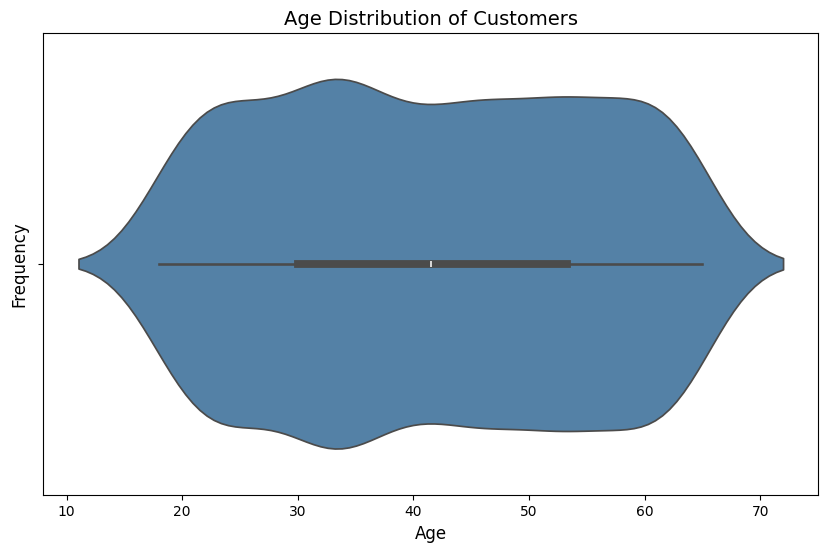

In [7]:
#Find the age distribution of customers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x=dataset['Age'], color='steelblue')
plt.title('Age Distribution of Customers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)  # Note: Frequency isn't applicable for violin plots, but kept for consistency
plt.show()

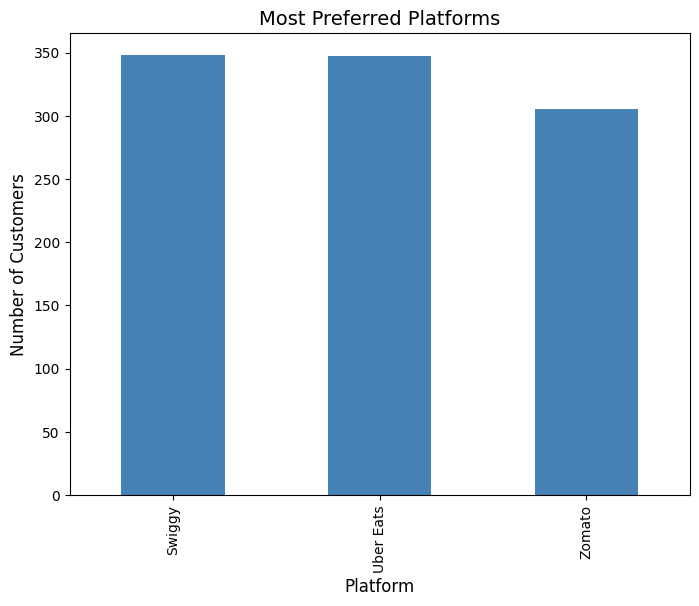

In [8]:
# What is the most preferred platform?
platform_counts = dataset['Preferred Platform'].value_counts()

plt.figure(figsize=(8, 6))
platform_counts.plot(kind='bar', color='steelblue')
plt.title('Most Preferred Platforms', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

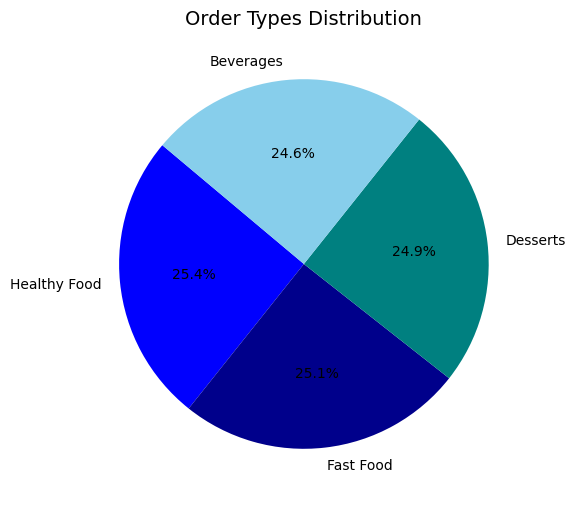

In [9]:
# What is the frequency of order types?
order_counts = dataset['Order Type'].value_counts()

plt.figure(figsize=(8, 6))
order_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue','darkblue','teal','skyblue'])
plt.title('Order Types Distribution', fontsize=14)
plt.ylabel('')
plt.show()

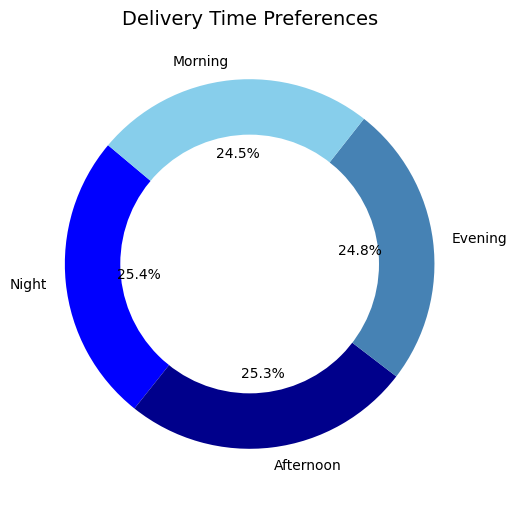

In [10]:
#Which delivery time preference is most popular?
time_pref_counts = dataset['Delivery Time Preference'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    time_pref_counts, 
    labels=time_pref_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
   colors=['blue','darkblue','steelblue','skyblue']
)
# Add a circle for a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Delivery Time Preferences', fontsize=14)
plt.show()

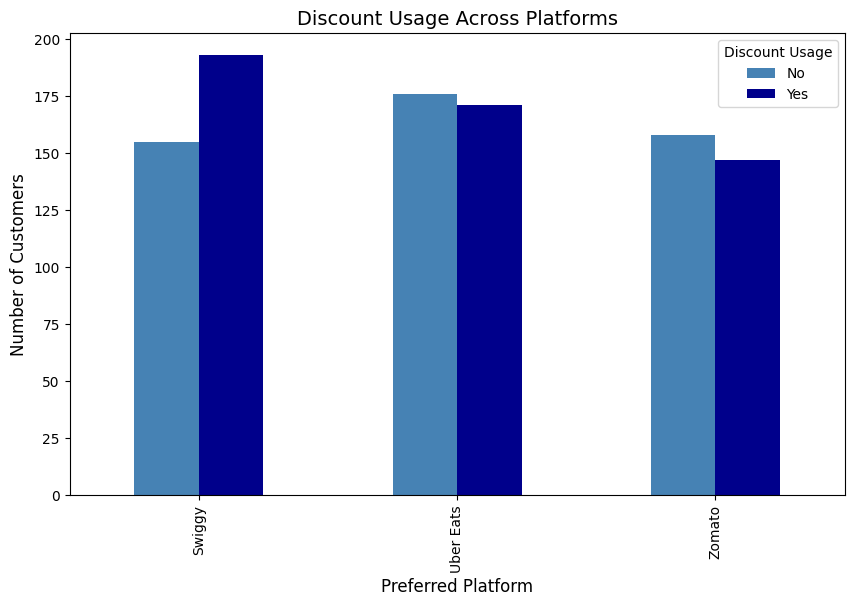

In [11]:
# How does discount usage vary across platforms?
discount_platform = dataset.groupby(['Preferred Platform', 'Discount Usage']).size().unstack()
discount_platform.plot(kind='bar', stacked=False, figsize=(10, 6), color=['steelblue', 'darkblue'])
plt.title('Discount Usage Across Platforms', fontsize=14)
plt.xlabel('Preferred Platform', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Discount Usage')
plt.show()

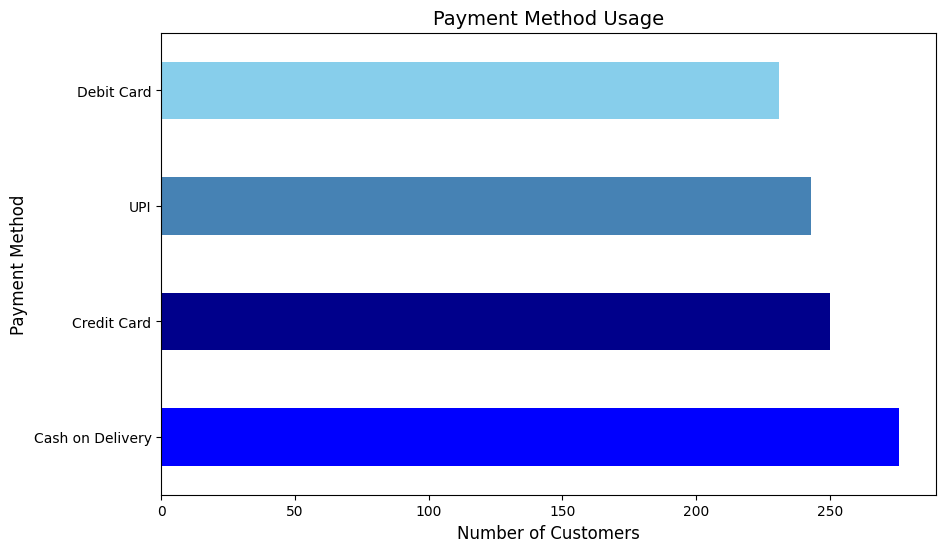

In [12]:
# How does payment method usage vary?
payment_method_counts = dataset['Payment Method'].value_counts()
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='barh', color=['blue','darkblue','steelblue','skyblue'])
plt.title('Payment Method Usage', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.show()

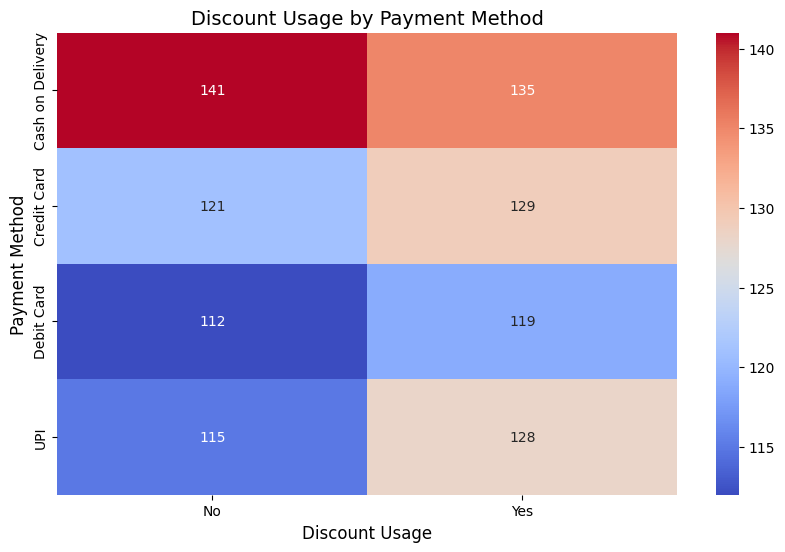

In [13]:
#Discount usage vary by payment method.
discount_payment = dataset.groupby(['Payment Method', 'Discount Usage']).size().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(discount_payment, annot=True, cmap='coolwarm', fmt='d')
plt.title('Discount Usage by Payment Method', fontsize=14)
plt.xlabel('Discount Usage', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.show()

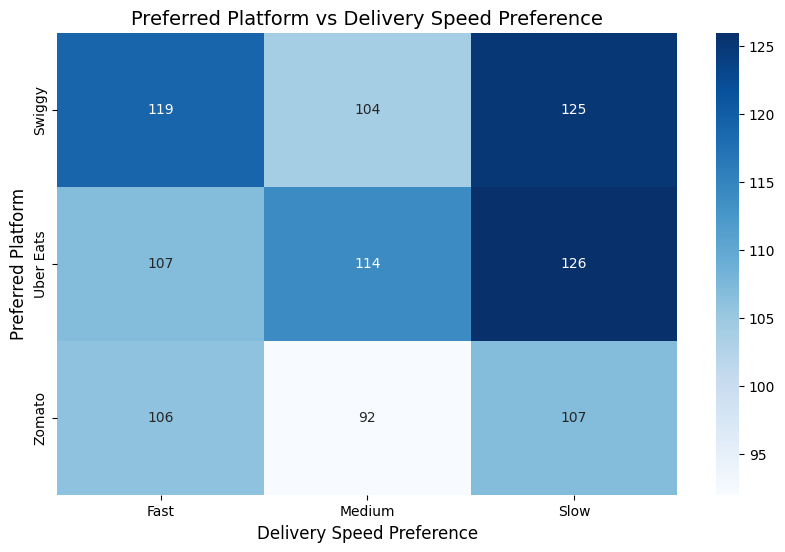

In [14]:
#Preferred platform vs Delivery speed preferance.
platform_delivery_speed = dataset.groupby(['Preferred Platform', 'Delivery Speed Preference']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(platform_delivery_speed, annot=True, cmap='Blues', fmt='g')
plt.title('Preferred Platform vs Delivery Speed Preference', fontsize=14)
plt.xlabel('Delivery Speed Preference', fontsize=12)
plt.ylabel('Preferred Platform', fontsize=12)
plt.show()

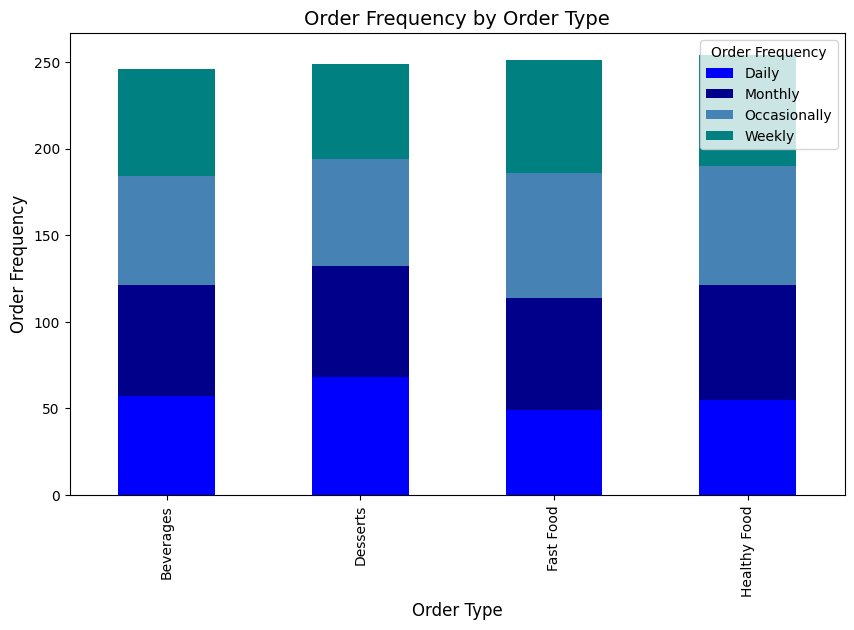

In [15]:
# How does Order Frequency vary by Order Type?
order_frequency_type = dataset.groupby(['Order Type', 'Order Frequency']).size().unstack().fillna(0)
order_frequency_type.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue','darkblue','steelblue','teal'])
plt.title('Order Frequency by Order Type', fontsize=14)
plt.xlabel('Order Type', fontsize=12)
plt.ylabel('Order Frequency', fontsize=12)
plt.legend(title='Order Frequency')
plt.show()

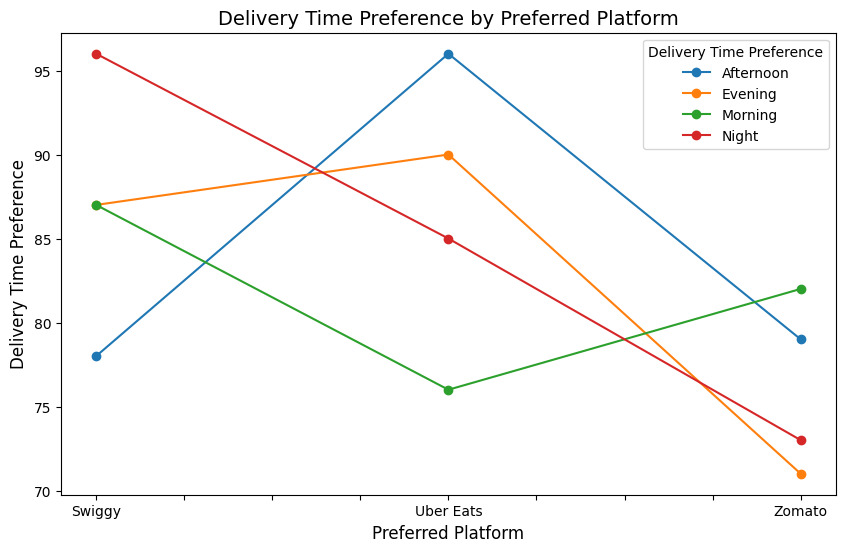

In [16]:
#How does Delivery Time Preference vary by Preferred Platform?
delivery_time_platform = dataset.groupby(['Preferred Platform', 'Delivery Time Preference']).size().unstack().fillna(0)
delivery_time_platform.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Delivery Time Preference by Preferred Platform', fontsize=14)
plt.xlabel('Preferred Platform', fontsize=12)
plt.ylabel('Delivery Time Preference', fontsize=12)
plt.legend(title='Delivery Time Preference')
plt.show()

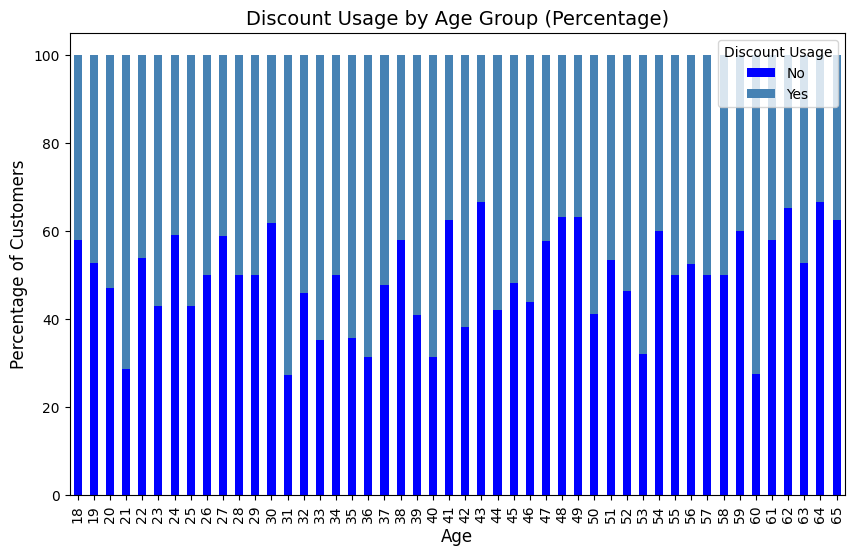

In [17]:
#percentage of customers using discounts for different age groups.
discount_age = dataset.groupby(['Age', 'Discount Usage']).size().unstack()
# Calculating the percentage of customers using discounts for each age group
discount_age_percentage = discount_age.div(discount_age.sum(axis=1), axis=0) * 100
discount_age_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'steelblue'])
plt.title('Discount Usage by Age Group (Percentage)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.legend(title='Discount Usage')
plt.show()

***CONCLUSION :***

***The analysis highlights key insights into customer preferences across different platforms. It reveals that order frequency and size vary, with some platforms showing higher engagement and larger orders. Customers also exhibit differing satisfaction levels, payment methods, and discount usage based on the platform they choose. By examining these trends, businesses can tailor their strategies for each platform, enhancing customer satisfaction and potentially driving greater sales. Additionally, understanding these patterns can guide decisions on promotional offers and service improvements to meet customer expectations more effectively.***